In [1]:
import numpy as np
import csv
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout, RepeatVector
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import sys
import heapq
import seaborn as sns
from pylab import rcParams
import re

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 12, 5

/Users/anmolagarwal/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/anmolagarwal/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/anmolagarwal/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
with open('training_POSdata.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)
    
print('corpus length:', len(your_list))
    

corpus length: 86837


In [3]:
your_list[0]

['hhd1',
 'ताजो\\JJ',
 'स्वास\\N_NN',
 'आनी\\CC_CCD',
 'चकचकीत\\JJ',
 'दांत\\N_NN',
 'तुमचें\\PR_PRP',
 'व्यक्तीमत्व\\N_NN',
 'परजळायतात\\V_VM_VF']

In [4]:
length = len(your_list)
my_list = []

for i in range(length):
    my_list.append(your_list[i][1:])
    
text = []
for j in my_list:
    for i in j:
        split = i.split('\\')
        #print(split)
        text.append(split[0])
    



In [5]:
text1 = []

for i in range(len(text)):
  for j in range(len(text[i])):
    text1.append(text[i][j])
    
text = text1

In [6]:
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print(len(chars))

273


In [7]:
SEQUENCE_LENGTH = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - SEQUENCE_LENGTH, step):
    sentences.append(text[i: i + SEQUENCE_LENGTH])
    next_chars.append(text[i + SEQUENCE_LENGTH])
    
print(len(sentences))

1852268


In [8]:
X = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [9]:
model = Sequential()
model.add(LSTM(128, input_shape=(SEQUENCE_LENGTH, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

In [10]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.10, batch_size=256, epochs=10, shuffle=True).history

Train on 1667041 samples, validate on 185227 samples
Epoch 1/10
1667041/1667041 [==============================] - 1796s 1ms/step - loss: 2.2544 - acc: 0.3878 - val_loss: 2.1179 - val_acc: 0.4213
Epoch 2/10
1667041/1667041 [==============================] - 1640s 984us/step - loss: 2.0603 - acc: 0.4341 - val_loss: 2.0720 - val_acc: 0.4348
Epoch 3/10
1667041/1667041 [==============================] - 1631s 978us/step - loss: 2.0206 - acc: 0.4441 - val_loss: 2.0529 - val_acc: 0.4385
Epoch 4/10
1667041/1667041 [==============================] - 1686s 1ms/step - loss: 2.0010 - acc: 0.4492 - val_loss: 2.0520 - val_acc: 0.4393
Epoch 5/10
1667041/1667041 [==============================] - 1719s 1ms/step - loss: 1.9888 - acc: 0.4522 - val_loss: 2.0469 - val_acc: 0.4405
Epoch 6/10
1667041/1667041 [==============================] - 1779s 1ms/step - loss: 1.9803 - acc: 0.4541 - val_loss: 2.0434 - val_acc: 0.4403
Epoch 7/10
1667041/1667041 [==============================] - 1792s 1ms/step - loss: 

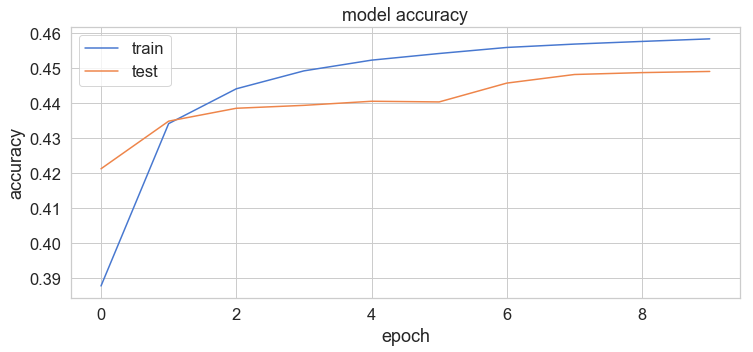

In [11]:
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

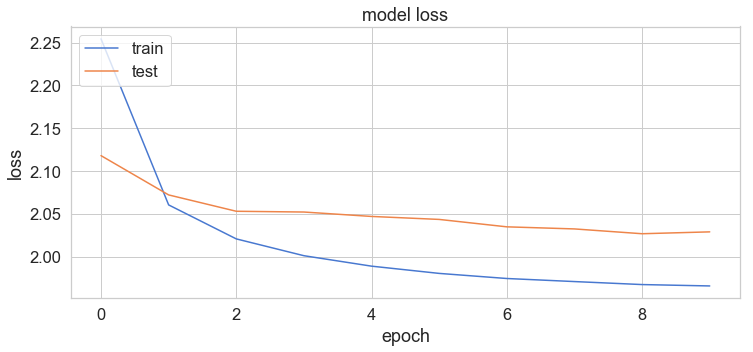

In [12]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

In [13]:
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(chars)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

In [25]:
text2 = text[0:40]
prepare_input(text2)
    

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [39]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [40]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [41]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    a = []
    for idx in next_indices:
        a.append(indices_char[idx])
        a.append(predict_completion(text[1:].append(indices_char[idx])))
    return a
#[indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]    

In [43]:
print(text2)
print(predict_completions(text2))
print()

['त', 'ा', 'ज', 'ो', 'स', '्', 'व', 'ा', 'स', 'आ', 'न', 'ी', 'च', 'क', 'च', 'क', 'ी', 'त', 'द', 'ा', 'ं', 'त', 'त', 'ु', 'म', 'च', 'े', 'ं', 'व', '्', 'य', 'क', '्', 'त', 'ी', 'म', 'त', '्', 'व', 'प']


TypeError: 'NoneType' object is not iterable

In [38]:
prepare_input(text2)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])